### Drill: Formulating good research questions

Categorize each of the following research questions as "good" or "bad", and provide alternative formulations for the bad ones. Save your responses in a document of some kind, submit a link below, and discuss your reasoning with your mentor.

What is the 1994 rate of juvenile delinquency in the U.S.?
    
    Bad - what is the driving factor behind the juvenile delinquency rate

What can we do to reduce juvenile delinquency in the U.S.?

    Bad - Too vague, need specific hypothesis

Does education play a role in reducing juvenile delinquents' return to crime?

    Good

How many customers does AT&T currently serve in Washington, DC?

    Bad - How many customer does AT&T serve out of the total Washington DC market

What factors lead consumers to choose AT&T over other service providers?

    Good

How can AT&T attract more customers?

    Bad - What has been the most effective technique for attracting new customers for AT&T
    
Why did the Challenger Shuttle explode?
    
    Bad - too vague
    
Which genes are associated with increased risk of breast cancer?
    
    Good
        
Is it better to read to children at night or in the morning?
    
    Good - if there is a measurable definition of "better"
    
How does Google’s search algorithm work?

    Bad - What is the driving factor in Google's search algorithm 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [180]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [181]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [13]:
data.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [14]:
features = pd.get_dummies(data['cntry'])

In [15]:
# Nordic countries dummy.
features['Nordic'] = np.where((data['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], data['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


In [16]:
features['Adult_65plus'] = np.where(data['agea']>=65, 1, 0)

# Check to make sure it worked.
print(data['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


### Drill: TLADS 

Categorize each of the variables in the ESS dataset as categorical or continuous, and if continuous as ordinal, interval, or ratio variables. Check your work with your mentor, and discuss what that information might imply for feature engineering with this data.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


cntry = categorical

idno = categorical

year = categorical

tvtot = continuous, ordinal

ppltrst = continuous, ordinal

pplfair = continuous, ordinal

pplhlp = continuous, ordinal

happy = continuous, ordinal

sclmeet = continuous, ordinal

sclact = continuous, ordinal

gndr = categorical

agea = continuous, ratio

partner = categorical

In [20]:
data.year.unique()

array([6, 7], dtype=int64)

### Challenge: Preparing a dataset for modeling

Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [2]:
data = pd.read_csv('Data/Superhero/charcters_stats.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
Name            611 non-null object
Alignment       608 non-null object
Intelligence    611 non-null int64
Strength        611 non-null int64
Speed           611 non-null int64
Durability      611 non-null int64
Power           611 non-null int64
Combat          611 non-null int64
Total           611 non-null int64
dtypes: int64(7), object(2)
memory usage: 43.0+ KB


In [5]:
data.head(25)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
9,Agent Bob,good,10,8,13,5,5,20,61


In [7]:
# only using data that is on a 100 scale
data = data[data['Total']>6]
for j in data.loc[:,'Intelligence':'Combat']:
    data = data[data[j]>0]

In [8]:
data.head(25)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
9,Agent Bob,good,10,8,13,5,5,20,61
10,Agent Zero,good,75,28,38,80,72,95,388
11,Air-Walker,bad,50,85,100,85,100,40,460


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 610
Data columns (total 9 columns):
Name            432 non-null object
Alignment       430 non-null object
Intelligence    432 non-null int64
Strength        432 non-null int64
Speed           432 non-null int64
Durability      432 non-null int64
Power           432 non-null int64
Combat          432 non-null int64
Total           432 non-null int64
dtypes: int64(7), object(2)
memory usage: 33.8+ KB


In [124]:
outcome = data.Total
categorical = data.Alignment
continuous = [data.Intelligence, data.Combat, data.Power, data.Strength, data.Durability, data.Speed]

In [186]:
data_subset = data.loc[:,['Intelligence','Strength','Speed','Durability','Power','Combat']]

In [187]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 610
Data columns (total 6 columns):
Intelligence    432 non-null int64
Strength        432 non-null int64
Speed           432 non-null int64
Durability      432 non-null int64
Power           432 non-null int64
Combat          432 non-null int64
dtypes: int64(6)
memory usage: 23.6 KB


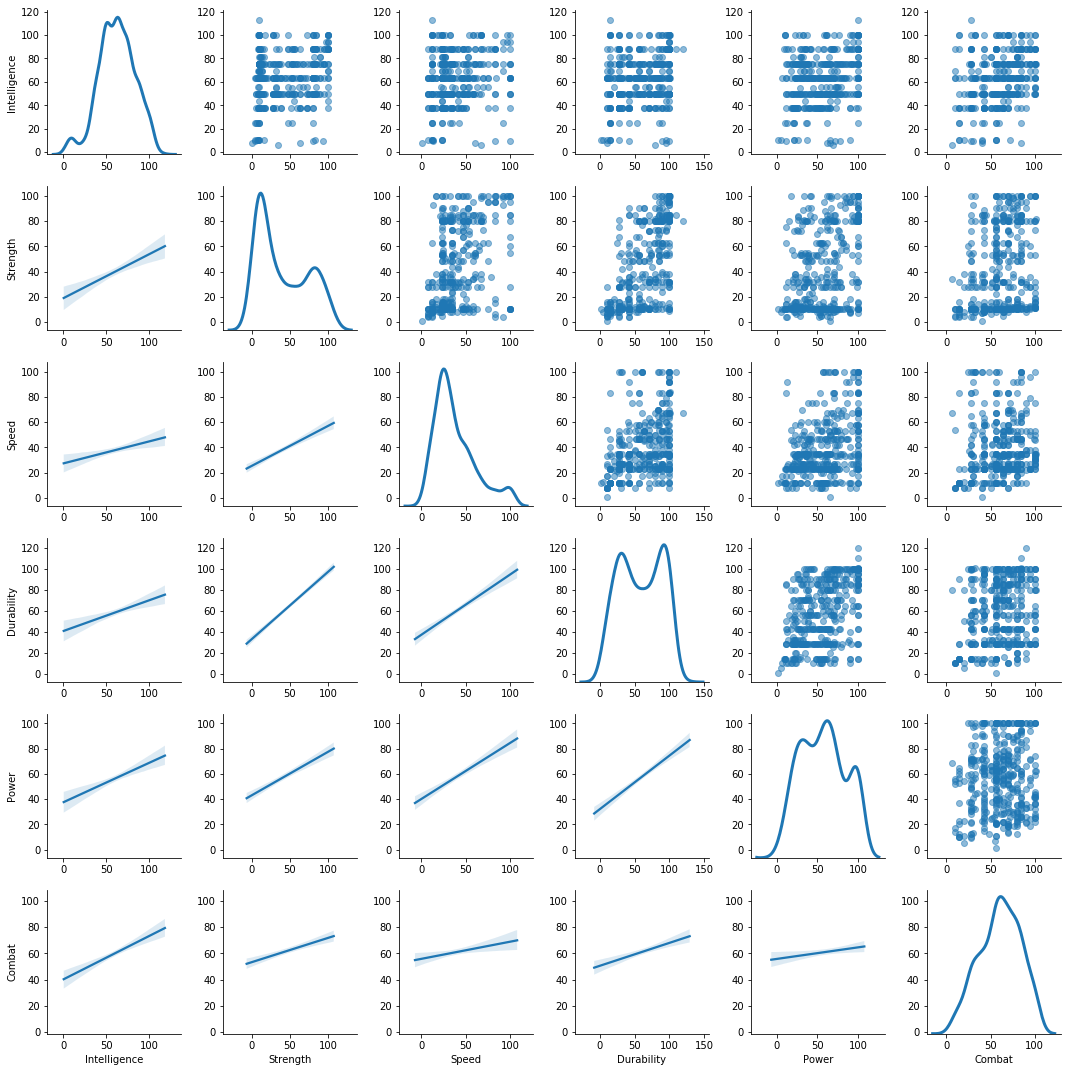

In [188]:
graph = sns.PairGrid(data_subset.dropna(), diag_sharey=False)
graph.map_upper(plt.scatter, alpha=.5)
graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

In [189]:
data_jittered = data_subset.dropna()
jitter = pd.DataFrame(np.random.uniform(-.3,.3, size=(data_jittered.shape)),
                      columns=data_jittered.columns)
data_jittered = data_jittered.add(jitter)

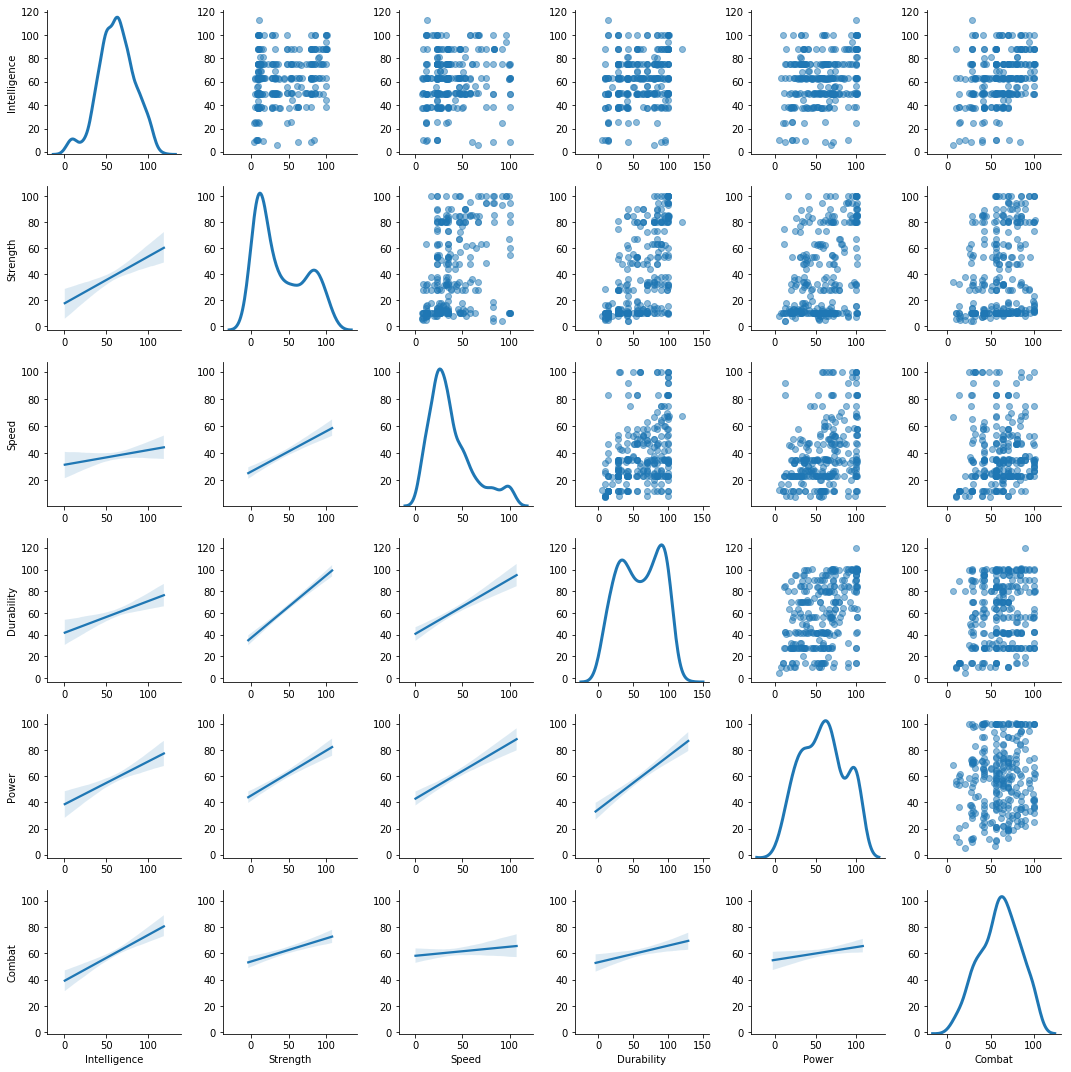

In [190]:
graph = sns.PairGrid(data_jittered.dropna(), diag_sharey=False)
graph.map_upper(plt.scatter, alpha=.5)
graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

              Intelligence  Strength     Speed  Durability     Power    Combat
Intelligence      1.000000  0.223688  0.156801    0.201449  0.239449  0.299792
Strength          0.223688  1.000000  0.443539    0.686615  0.411054  0.260901
Speed             0.156801  0.443539  1.000000    0.441204  0.380262  0.132310
Durability        0.201449  0.686615  0.441204    1.000000  0.470994  0.229254
Power             0.239449  0.411054  0.380262    0.470994  1.000000  0.104231
Combat            0.299792  0.260901  0.132310    0.229254  0.104231  1.000000


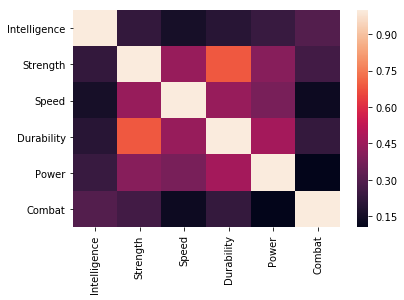

In [191]:
cormat = data_subset.corr()
print(cormat)
sns.heatmap(cormat)
plt.show()

In [192]:
good = data.loc[(data['Alignment']=='good')]
bad = data.loc[(data['Alignment']=='bad')]
neutral = data.loc[(data['Alignment']=='neutral')]

In [193]:
data.Alignment.value_counts()

good       298
bad        121
neutral     11
Name: Alignment, dtype: int64

In [194]:
data_melt = data.loc[:,['Alignment','Intelligence','Strength','Speed','Durability','Power','Combat']].dropna()
data_melt = pd.melt(data_melt, id_vars=['Alignment'])

In [195]:
data_melt.Alignment.unique()

array(['good', 'bad', 'neutral'], dtype=object)

In [196]:
data_melt.variable.unique()


array(['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'], dtype=object)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 610
Data columns (total 9 columns):
Name            432 non-null object
Alignment       430 non-null object
Intelligence    432 non-null int64
Strength        432 non-null int64
Speed           432 non-null int64
Durability      432 non-null int64
Power           432 non-null int64
Combat          432 non-null int64
Total           432 non-null int64
dtypes: int64(7), object(2)
memory usage: 33.8+ KB


C:\Users\polluxs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


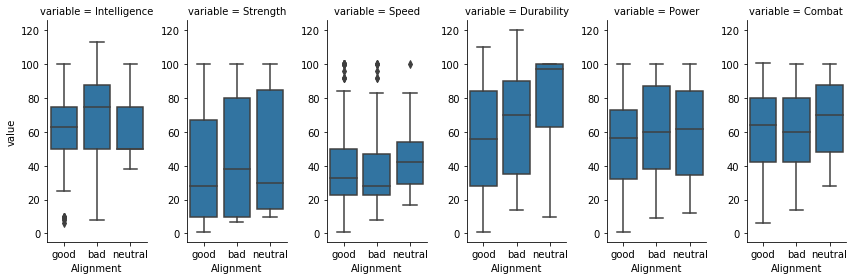

       Intelligence    Strength       Speed  Durability       Power  \
count    432.000000  432.000000  432.000000  432.000000  432.000000   
mean      62.442130   40.627315   38.206019   58.761574   57.016204   
std       20.736472   32.354654   23.080243   30.172453   27.090417   
min        6.000000    1.000000    1.000000    1.000000    1.000000   
25%       50.000000   10.000000   23.000000   28.000000   34.000000   
50%       63.000000   32.000000   33.000000   56.000000   58.000000   
75%       75.000000   73.000000   50.000000   89.250000   75.250000   
max      113.000000  100.000000  100.000000  120.000000  100.000000   

           Combat  
count  432.000000  
mean    60.673611  
std     22.859653  
min      6.000000  
25%     42.000000  
50%     64.000000  
75%     80.000000  
max    101.000000  
Intelligence
Ttest_indResult(statistic=-3.3969776680414876, pvalue=0.00074677228380642512)
Strength
Ttest_indResult(statistic=-2.3405648982901548, pvalue=0.019725152950524856)
Spee

In [198]:
g = sns.FacetGrid(data_melt, col='variable', size=4, aspect=.5)
g = g.map(sns.boxplot, 'Alignment', 'value')
plt.show()

print(data_subset.describe())

for col in data.loc[:,'Intelligence':'Combat'].columns:
    print(col)
    print(stats.ttest_ind(
        data[data['Alignment'] == 'good'][col].dropna(),
        data[data['Alignment'] == 'bad'][col].dropna()
    ))

In [10]:
dummies = pd.get_dummies(data['Alignment'])

In [11]:
data_added_features = data.dropna()

In [12]:
data_added_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 610
Data columns (total 9 columns):
Name            430 non-null object
Alignment       430 non-null object
Intelligence    430 non-null int64
Strength        430 non-null int64
Speed           430 non-null int64
Durability      430 non-null int64
Power           430 non-null int64
Combat          430 non-null int64
Total           430 non-null int64
dtypes: int64(7), object(2)
memory usage: 33.6+ KB


In [13]:
data_added_features['Bad'] = dummies['bad']
data_added_features['Good'] = dummies['good']
data_added_features['Neutral'] = dummies['neutral']

C:\Users\polluxs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\polluxs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\polluxs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

Here I generated dummy variables from the Alignment variable, looking to see if the characters type has any explanatory power.

In [14]:
data_added_features.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Bad,Good,Neutral
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,62.441860,40.611628,38.213953,58.755814,56.946512,60.702326,317.672093,0.281395,0.693023,0.025581
std,20.767222,32.410758,23.051696,30.173135,27.119599,22.820261,104.684127,0.450204,0.461777,0.158067
min,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,61.000000,0.000000,0.000000,0.000000
25%,50.000000,10.000000,23.000000,28.000000,34.000000,42.000000,239.000000,0.000000,0.000000,0.000000
50%,63.000000,32.000000,33.000000,56.000000,57.500000,64.000000,306.000000,0.000000,1.000000,0.000000
75%,75.000000,73.000000,50.000000,88.000000,74.750000,80.000000,383.750000,1.000000,1.000000,0.000000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000,1.000000,1.000000,1.000000


In [15]:
data_added_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 610
Data columns (total 12 columns):
Name            430 non-null object
Alignment       430 non-null object
Intelligence    430 non-null int64
Strength        430 non-null int64
Speed           430 non-null int64
Durability      430 non-null int64
Power           430 non-null int64
Combat          430 non-null int64
Total           430 non-null int64
Bad             430 non-null uint8
Good            430 non-null uint8
Neutral         430 non-null uint8
dtypes: int64(7), object(2), uint8(3)
memory usage: 34.9+ KB


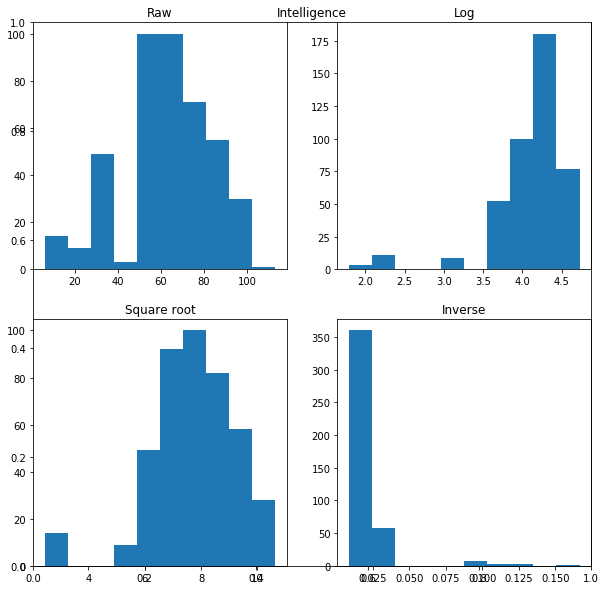

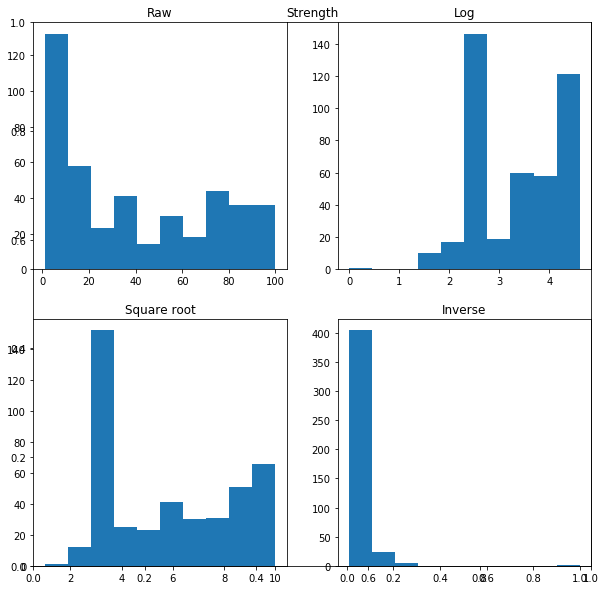

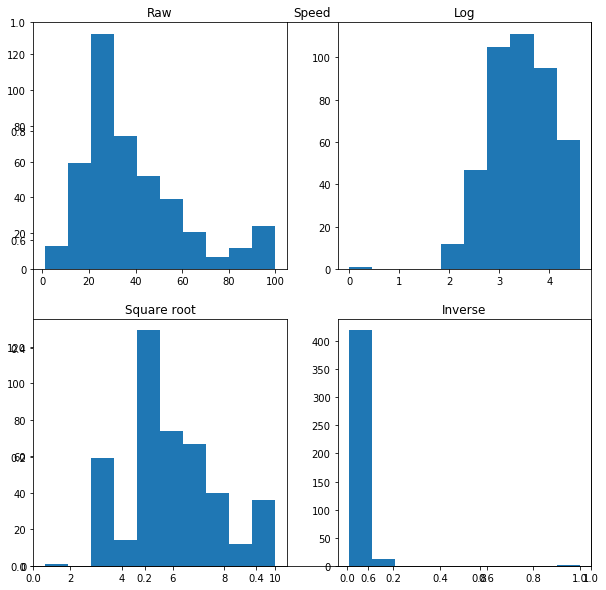

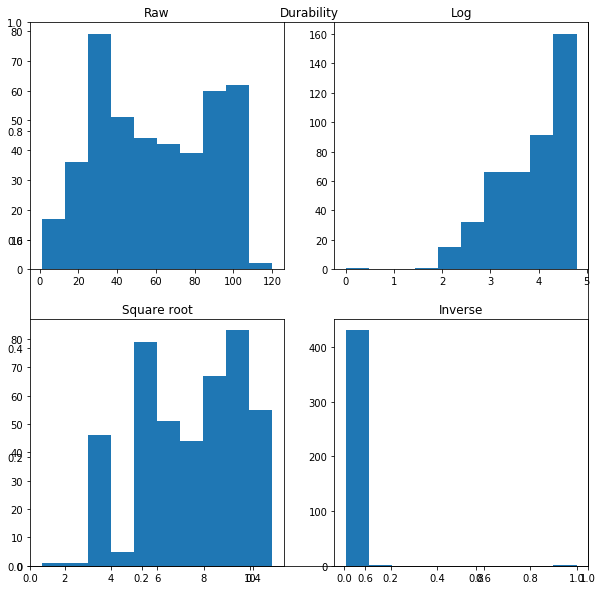

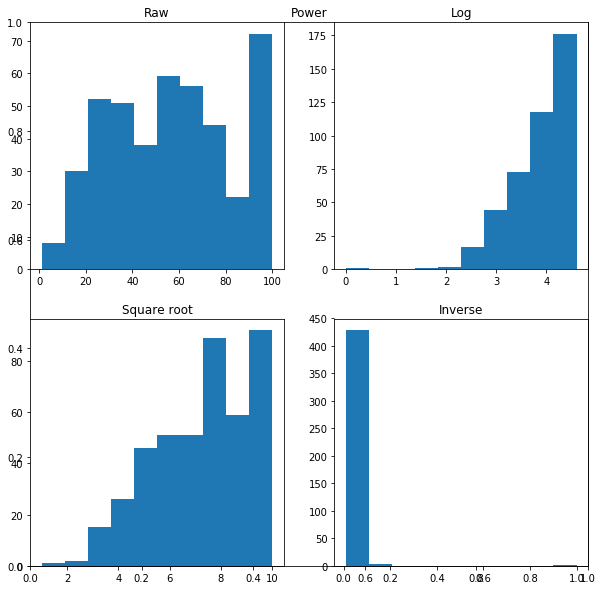

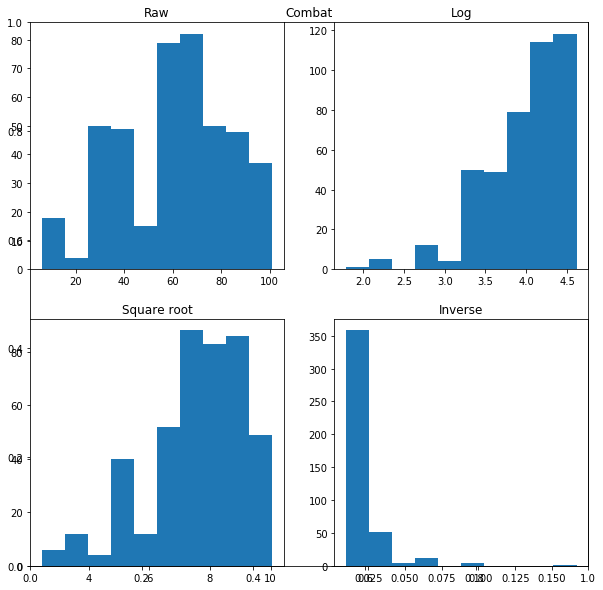

In [206]:
for j in data.loc[:,'Intelligence':'Combat']:
    

    fig = plt.figure(figsize=(10,10))
    
    plt.title(j)
    
    fig.add_subplot(221)
    plt.hist(data[j].dropna())
    plt.title('Raw')

    fig.add_subplot(222)
    plt.hist(np.log(data[j].dropna()))
    plt.title('Log')

    fig.add_subplot(223)
    plt.hist(np.sqrt(data[j].dropna()))
    plt.title('Square root')

    ax3=fig.add_subplot(224)
    plt.hist(1/data[j].dropna())
    plt.title('Inverse')
    plt.show()


In [290]:
data_added_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 610
Data columns (total 12 columns):
Name            430 non-null object
Alignment       430 non-null object
Intelligence    430 non-null int64
Strength        430 non-null int64
Speed           430 non-null int64
Durability      430 non-null int64
Power           430 non-null int64
Combat          430 non-null int64
Total           430 non-null int64
Bad             430 non-null uint8
Good            430 non-null uint8
Neutral         430 non-null uint8
dtypes: int64(7), object(2), uint8(3)
memory usage: 34.9+ KB


In [16]:
data_added_features['log_Intelligence'] = np.log(data_added_features['Intelligence'])
data_added_features['log_Strength'] = np.log(data_added_features['Strength'])
data_added_features['log_Speed'] = np.log(data_added_features['Speed'])
data_added_features['log_Durability'] = np.log(data_added_features['Durability'])
data_added_features['log_Power'] = np.log(data_added_features['Power'])
data_added_features['log_Combat'] = np.log(data_added_features['Combat'])

C:\Users\polluxs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\polluxs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\polluxs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [17]:
data_added_features.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Bad,Good,Neutral,log_Intelligence,log_Strength,log_Speed,log_Durability,log_Power,log_Combat
0,3-D Man,good,50,31,43,32,25,52,233,0,1,0,3.912023,3.433987,3.761200,3.465736,3.218876,3.951244
1,A-Bomb,good,38,100,17,80,17,64,316,0,1,0,3.637586,4.605170,2.833213,4.382027,2.833213,4.158883
2,Abe Sapien,good,88,14,35,42,35,85,299,0,1,0,4.477337,2.639057,3.555348,3.737670,3.555348,4.442651
3,Abin Sur,good,50,90,53,64,84,65,406,0,1,0,3.912023,4.499810,3.970292,4.158883,4.430817,4.174387
4,Abomination,bad,63,80,53,90,55,95,436,1,0,0,4.143135,4.382027,3.970292,4.499810,4.007333,4.553877


Added the log of each of continuous variable.

In [18]:
data_added_features['Goodinafight'] = (data_added_features['Strength']+
                                        data_added_features['Durability']+
                                               data_added_features['Combat'])/3

C:\Users\polluxs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Generated a new variable based on an average of 3 of the current variables, wanted to see if there was any variance explained with an interaction variable

In [19]:
data_added_features.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Bad,Good,Neutral,log_Intelligence,log_Strength,log_Speed,log_Durability,log_Power,log_Combat,Goodinafight
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,62.441860,40.611628,38.213953,58.755814,56.946512,60.702326,317.672093,0.281395,0.693023,0.025581,4.055281,3.301997,3.461284,3.885684,3.890508,4.009474,53.356589
std,20.767222,32.410758,23.051696,30.173135,27.119599,22.820261,104.684127,0.450204,0.461777,0.158067,0.455885,0.955726,0.629169,0.691488,0.617023,0.488700,22.402917
min,6.000000,1.000000,1.000000,1.000000,1.000000,6.000000,61.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,1.791759,8.000000
25%,50.000000,10.000000,23.000000,28.000000,34.000000,42.000000,239.000000,0.000000,0.000000,0.000000,3.912023,2.302585,3.135494,3.332205,3.526361,3.737670,36.833333
50%,63.000000,32.000000,33.000000,56.000000,57.500000,64.000000,306.000000,0.000000,1.000000,0.000000,4.143135,3.465736,3.496508,4.025352,4.051747,4.158883,50.833333
75%,75.000000,73.000000,50.000000,88.000000,74.750000,80.000000,383.750000,1.000000,1.000000,0.000000,4.317488,4.290459,3.912023,4.477140,4.314132,4.382027,71.583333
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000,1.000000,1.000000,1.000000,4.727388,4.605170,4.605170,4.787492,4.605170,4.615121,100.000000


In [21]:
new_dataset = data_added_features[data_added_features.columns[8:]]

In [ ]:
df.loc[:, df.columns != col]

In [22]:
features = new_dataset.loc[:, new_dataset.columns != 'Total']
X = features
y = new_dataset['Total']

In [23]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [34]:
lr = LinearRegression()

print(cross_val_score(lr, Xs, y, cv=5).mean())

0.976468834677


In [50]:
pca = PCA()
Xt = pca.fit_transform(Xs)

In [51]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[  3.65989081e+00   1.93207811e+00   1.06187089e+00   9.81390733e-01
   8.36145664e-01   6.32022530e-01   5.69303908e-01   3.07567474e-01
   4.30399066e-02   2.54286715e-31]
[  3.65137944e-01   1.92758490e-01   1.05940142e-01   9.79108429e-02
   8.34201139e-02   6.30552710e-02   5.67979946e-02   3.06852201e-02
   4.29398138e-03   2.53695350e-32]


In [45]:
lr = LinearRegression()

print(cross_val_score(lr, Xt, y, cv=5).mean())

0.976619426747


In [46]:
pca = PCA(n_components=5)
Xt = pca.fit_transform(Xs)

In [47]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[ 3.65989081  1.93207811  1.06187089  0.98139073  0.83614566]
[ 0.36513794  0.19275849  0.10594014  0.09791084  0.08342011]


In [48]:
lr = LinearRegression()

print(cross_val_score(lr, Xt, y, cv=5).mean())

0.927899403447


In [ ]:
cross_val_score